In [78]:
!pip install japanize_matplotlib

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import japanize_matplotlib

In [0]:
sample_size = 100
dim = 2

data = np.random.rand(sample_size, dim)

In [81]:
data.shape

(100, 2)

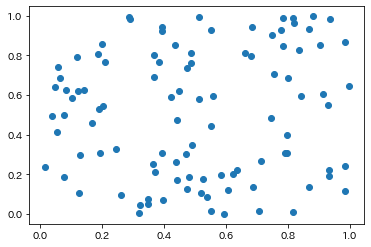

In [82]:
plt.scatter(data[:, 0], data[:, 1])

In [83]:
np.corrcoef(data[:, 0], data[:, 1])

array([[1.        , 0.08237582],
       [0.08237582, 1.        ]])

In [0]:
corr = np.corrcoef(data[:, 0], data[:, 1])

In [0]:
def t(corr, sample_size):
    return corr*np.sqrt(sample_size-2) / np.sqrt(1 - corr**2)

In [86]:
t(corr[1, 0], sample_size)

0.8182600170313679

## 無相関

In [0]:
N_REPEAT = 10000
sample_sizes = list(map(int, (3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500, 2000)))

In [111]:
sample_sizes

[3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500, 2000]

In [0]:
CI = 0.95  # 信頼区間

0.9481


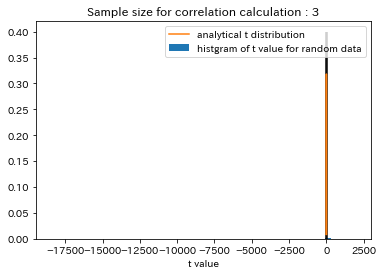

0.9469


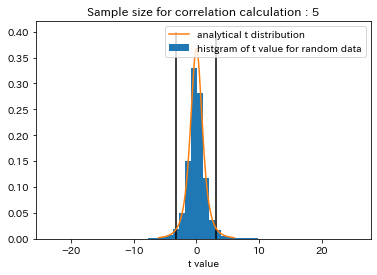

0.9528


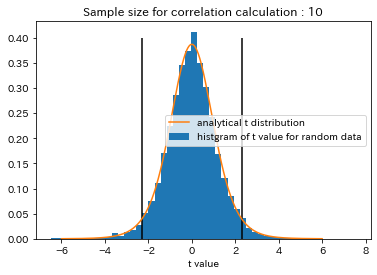

0.952


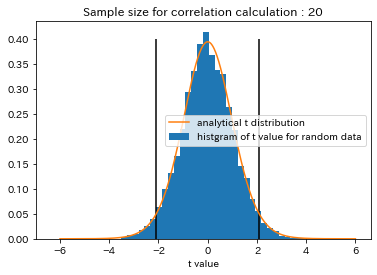

0.9458


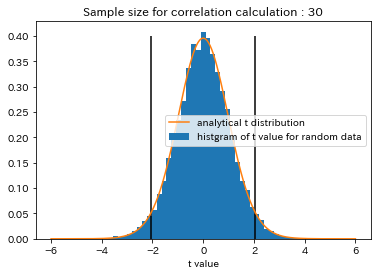

0.9489


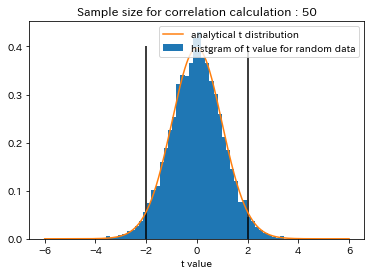

0.951


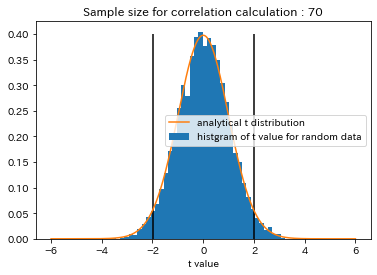

0.9493


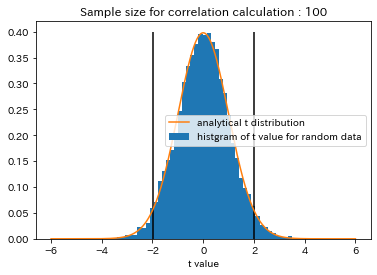

0.9477


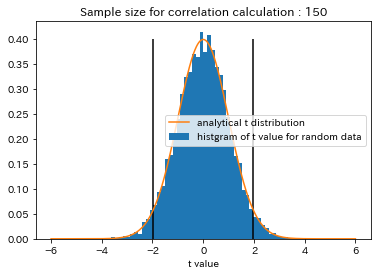

0.9475


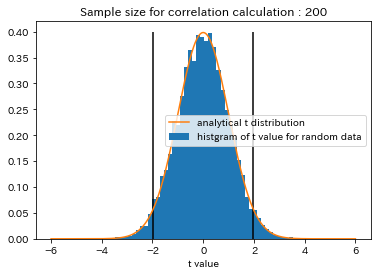

0.9495


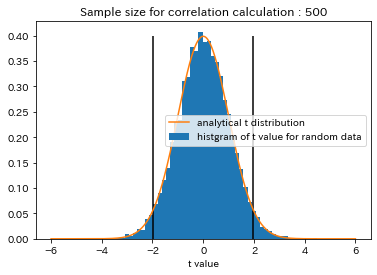

0.945


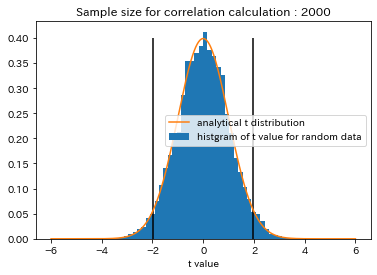

In [113]:
uncorrelated_rates = []

for sample_size in sample_sizes:
    t_vals = []
    for i in range(N_REPEAT):
        data = np.random.rand(sample_size, dim)

        corr = np.corrcoef(data[:, 0], data[:, 1])

        t_val = t(corr[1, 0], sample_size)

        t_vals.append(t_val)

    plt.hist(t_vals, bins=50, density=True, label='histgram of t value for random data')

    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.t.pdf(x, sample_size-2), label='analytical t distribution')

    plt.xlabel('t value')
    plt.legend()
    plt.title(f'Sample size for correlation calculation : {sample_size}')

    p_val = stats.t.ppf(1-(1-CI)/2, sample_size-2)
    uncorrelated_cnt = ((t_vals >= -p_val) & (t_vals <= p_val)).sum()
    uncorrelated_rate = uncorrelated_cnt / len(t_vals)
    print(uncorrelated_rate)
    uncorrelated_rates.append(uncorrelated_rate)

    plt.vlines([-p_val, p_val], 0, 0.4)

    plt.show()

In [114]:
uncorrelated_rates

[0.9481,
 0.9469,
 0.9528,
 0.952,
 0.9458,
 0.9489,
 0.951,
 0.9493,
 0.9477,
 0.9475,
 0.9495,
 0.945]

(0.0, 1.0)

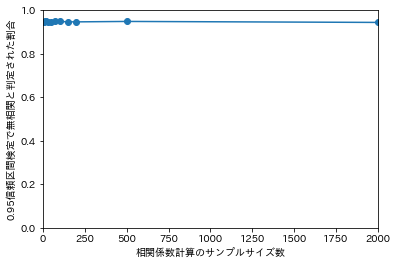

In [116]:
plt.plot(sample_sizes, uncorrelated_rates, marker='o')
plt.xlabel('相関係数計算のサンプルサイズ数')
plt.ylabel(f'{CI}信頼区間検定で無相関と判定された割合')
plt.xlim(0, 2000)
plt.ylim(0, 1)

## 相関あり

In [0]:
x = np.random.rand(100, 1)[:, 0]
y =  0.4*x + 0.6*np.random.rand(100, 1)[:, 0]

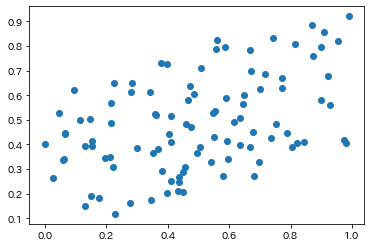

In [98]:
plt.scatter(x, y)

In [0]:
N_REPEAT = 10000
sample_sizes = list(map(int, (3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500)))

In [0]:
CI = 0.95  # 信頼区間

0.9278


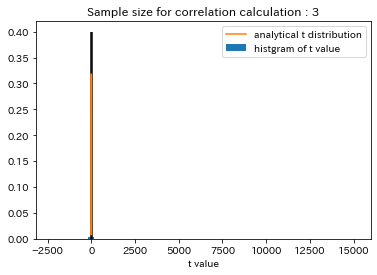

0.8588


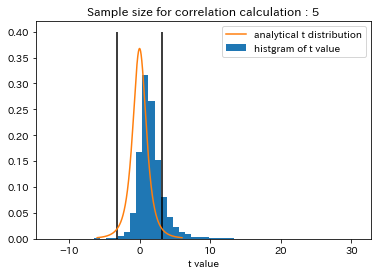

0.6196


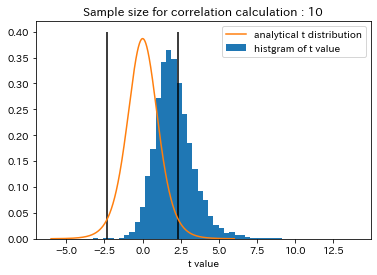

0.2352


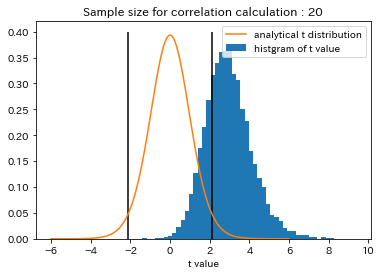

0.0719


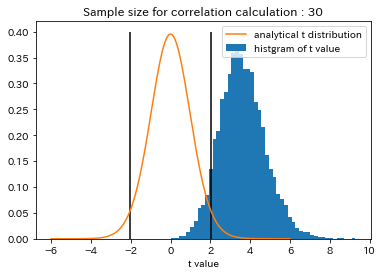

0.0048


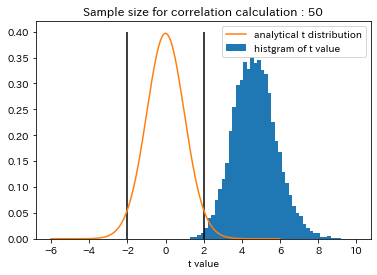

0.0005


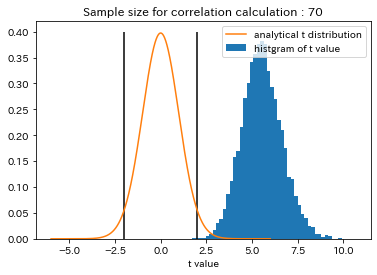

0.0


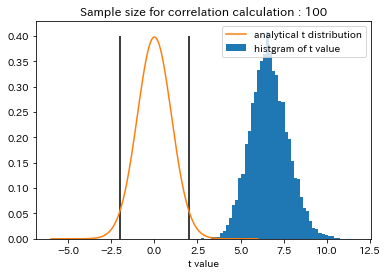

0.0


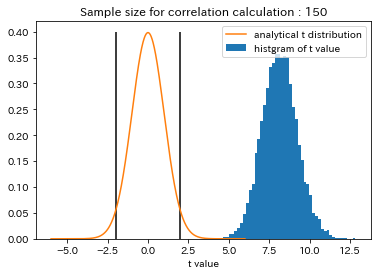

0.0


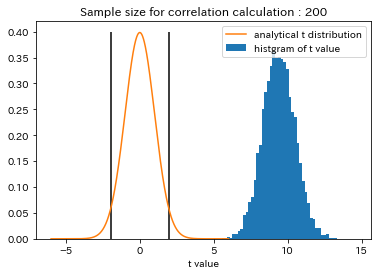

0.0


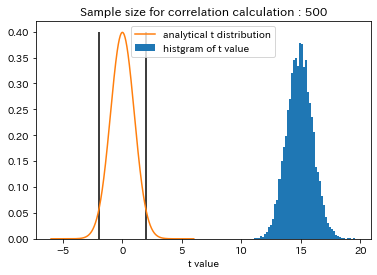

In [101]:
uncorrelated_rates = []

for sample_size in sample_sizes:
    t_vals = []
    for i in range(N_REPEAT):
        x = np.random.rand(sample_size, 1)[:, 0]
        y =  0.4*x + 0.6*np.random.rand(sample_size, 1)[:, 0]

        corr = np.corrcoef(x, y)

        t_val = t(corr[1, 0], sample_size)

        t_vals.append(t_val)

    t_vals = np.array(t_vals)

    plt.hist(t_vals, bins=50, density=True, label='histgram of t value')
    
    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.t.pdf(x, sample_size-2), label='analytical t distribution')

    plt.xlabel('t value')
    plt.legend()
    plt.title(f'Sample size for correlation calculation : {sample_size}')

    p_val = stats.t.ppf(1-(1-CI)/2, sample_size-2)
    uncorrelated_cnt = ((t_vals >= -p_val) & (t_vals <= p_val)).sum()
    uncorrelated_rate = uncorrelated_cnt / len(t_vals)
    print(uncorrelated_rate)
    uncorrelated_rates.append(uncorrelated_rate)

    plt.vlines([-p_val, p_val], 0, 0.4)

    plt.show()

(0.0, 210.0)

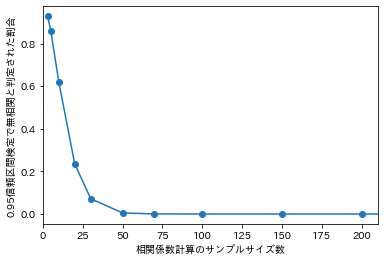

In [102]:
plt.plot(sample_sizes, uncorrelated_rates, marker='o')
plt.xlabel('相関係数計算のサンプルサイズ数')
plt.ylabel(f'{CI}信頼区間検定で無相関と判定された割合')
plt.xlim(0, 210)